## HW5 Doris Chen

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Stocks/Stocks15yr.csv")
df.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close,ticker
0,2000-01-03,78.749999,78.937494,67.375004,72.000008,4674400,46.354670,A
1,2000-01-04,68.125003,68.875002,64.750005,66.499996,4765100,42.813681,A
2,2000-01-05,66.250003,66.499996,60.312503,62.374999,5758600,40.157947,A
3,2000-01-06,61.625000,62.000002,58.124998,59.999992,2534400,38.628883,A
4,2000-01-07,59.062492,65.937493,59.000006,64.999998,2819600,41.847960,A


In [2]:
#a
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764767 entries, 0 to 1764766
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     int64  
 6   Adj Close  float64
 7   ticker     object 
dtypes: float64(5), int64(1), object(2)
memory usage: 107.7+ MB


In [3]:
df.Date = pd.to_datetime(df.Date)
df.ticker = df.ticker.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764767 entries, 0 to 1764766
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date       datetime64[ns]
 1   Open       float64       
 2   High       float64       
 3   Low        float64       
 4   Close      float64       
 5   Volume     int64         
 6   Adj Close  float64       
 7   ticker     category      
dtypes: category(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 97.6 MB


In [4]:
df.groupby(df.ticker).count().shape[0]

467

467 stocks are represented in the data set

In [5]:
#b
volume = pd.pivot_table(df, values='Volume', index=['Date'], aggfunc = 'sum')
volume

,Volume
Date,
2000-01-03,1725895600
2000-01-04,1797053400
2000-01-05,2204704200
2000-01-06,1974900100
2000-01-07,1866794200
...,...
2015-12-28,1263321400
2015-12-29,1342257500
2015-12-30,1176716800


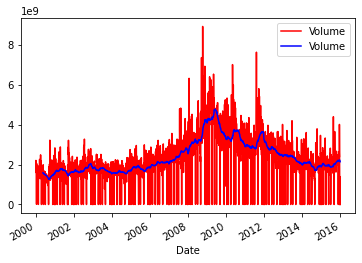

In [6]:
ax1 = volume.plot.line(color='r')
volume.rolling(100).mean().plot.line(color='b',ax=ax1)

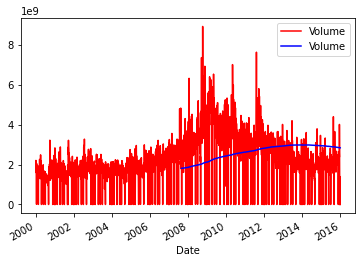

In [7]:
ax1 = volume.plot.line(color='r')
volume.rolling(2000).mean().plot.line(color='b',ax=ax1)

The period of peak trading volume is around 2009.
The increase of window size makes trend line smoother and shorter.

In [8]:
#c
df2 = pd.pivot_table(df, values='Adj Close',columns='ticker', index=['Date'])
df2

ticker,A,AA,AAPL,ABC,ABT,ACS,ADBE,ADI,ADM,ADP,...,X,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,46.354670,30.172580,3.660058,3.326019,9.639804,0.019,16.274667,32.947692,7.912229,29.184633,...,25.380447,8.810155,32.639550,35.933610,26.056526,7.151686,19.207609,118.750000,7.452527,43.820247
2000-01-04,42.813681,30.312376,3.351477,3.098946,9.364382,0.019,14.909395,31.280900,7.829816,29.184633,...,24.433043,9.013020,31.170373,35.116937,25.557438,7.151686,18.314232,110.750000,7.302727,41.698321
2000-01-05,40.157947,32.059823,3.400523,3.339381,9.347165,0.019,15.204175,31.737555,7.706187,28.904013,...,24.682360,9.360790,31.448326,34.348304,26.950724,7.275321,19.257241,102.625000,7.340181,41.648973
2000-01-06,38.628883,31.640436,3.106247,3.593170,9.674231,0.019,15.328291,30.869910,7.747397,29.289867,...,24.831950,9.273847,31.686571,31.369849,28.344010,7.284835,18.860185,92.046875,7.277768,42.241139
2000-01-07,41.847960,31.547238,3.253385,4.060687,9.777515,0.019,16.072985,31.737555,7.871019,29.956346,...,25.480174,9.273847,33.791067,34.924779,28.260829,7.265808,19.306873,101.812500,7.115481,42.339833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-28,41.436641,9.879438,105.031569,102.920592,44.203626,8.479,94.199997,55.219446,35.637363,84.698463,...,8.209238,35.553092,39.159087,46.829718,76.727130,61.055219,10.411228,33.599998,72.551420,27.421133
2015-12-29,42.011876,10.027927,106.919422,103.493520,44.979129,8.951,95.330002,56.060699,36.213419,85.775093,...,8.110331,35.631795,39.699415,47.202005,77.136399,61.753450,10.529314,34.040001,72.944441,27.589787
2015-12-30,41.823435,9.859640,105.523198,103.740474,44.439223,8.951,95.279999,55.317264,36.008383,85.320735,...,8.050987,35.808872,39.119790,46.868907,76.113237,61.254714,10.548996,33.369999,72.521945,27.252479


The reason for the gap between 2000-01-07 and 2000-01-10 is that 2000-01-08 and 2000-01-09 are weekends. The markets closed on holidays.

In [9]:
df2['2000-01-03' : '2001-01-03'].shape[0]

263

263 trading days are between 2000-01-03 and 2001-01-03

In [10]:
df2 = df2.resample('D').interpolate()
df2

ticker,A,AA,AAPL,ABC,ABT,ACS,ADBE,ADI,ADM,ADP,...,X,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,46.354670,30.172580,3.660058,3.326019,9.639804,0.019,16.274667,32.947692,7.912229,29.184633,...,25.380447,8.810155,32.639550,35.933610,26.056526,7.151686,19.207609,118.750000,7.452527,43.820247
2000-01-04,42.813681,30.312376,3.351477,3.098946,9.364382,0.019,14.909395,31.280900,7.829816,29.184633,...,24.433043,9.013020,31.170373,35.116937,25.557438,7.151686,18.314232,110.750000,7.302727,41.698321
2000-01-05,40.157947,32.059823,3.400523,3.339381,9.347165,0.019,15.204175,31.737555,7.706187,28.904013,...,24.682360,9.360790,31.448326,34.348304,26.950724,7.275321,19.257241,102.625000,7.340181,41.648973
2000-01-06,38.628883,31.640436,3.106247,3.593170,9.674231,0.019,15.328291,30.869910,7.747397,29.289867,...,24.831950,9.273847,31.686571,31.369849,28.344010,7.284835,18.860185,92.046875,7.277768,42.241139
2000-01-07,41.847960,31.547238,3.253385,4.060687,9.777515,0.019,16.072985,31.737555,7.871019,29.956346,...,25.480174,9.273847,33.791067,34.924779,28.260829,7.265808,19.306873,101.812500,7.115481,42.339833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-28,41.436641,9.879438,105.031569,102.920592,44.203626,8.479,94.199997,55.219446,35.637363,84.698463,...,8.209238,35.553092,39.159087,46.829718,76.727130,61.055219,10.411228,33.599998,72.551420,27.421133
2015-12-29,42.011876,10.027927,106.919422,103.493520,44.979129,8.951,95.330002,56.060699,36.213419,85.775093,...,8.110331,35.631795,39.699415,47.202005,77.136399,61.753450,10.529314,34.040001,72.944441,27.589787
2015-12-30,41.823435,9.859640,105.523198,103.740474,44.439223,8.951,95.279999,55.317264,36.008383,85.320735,...,8.050987,35.808872,39.119790,46.868907,76.113237,61.254714,10.548996,33.369999,72.521945,27.252479


.resample() frequency conversion and resampling of time series



.interpolate() function is basically used to fill NA values in the dataframe or series, and it interplates up to 367 days

In [11]:
#d
ann_return = 100*(df2.shift(periods=-365)-df2).div(df2)
ann_return

ticker,A,AA,AAPL,ABC,ABT,ACS,ADBE,ADI,ADM,ADP,...,X,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,-29.340291,-19.044023,-73.422662,220.884096,40.027702,-10.526316,42.683964,4.227307,30.387670,20.130978,...,-43.043868,58.507313,75.765885,-7.486632,16.258035,67.256281,-78.049131,-88.131579,-14.405275,10.209733
2000-01-04,-15.601492,-18.324205,-68.048774,251.293182,40.963750,21.052632,93.085890,27.299269,26.129286,17.590432,...,-40.189935,49.467149,71.692726,11.764705,13.374928,58.678988,-76.416854,-86.032731,-7.692263,19.682663
2000-01-05,-6.613214,-20.265864,-67.187489,199.200001,28.282576,21.052632,75.657384,20.000000,28.724919,10.792166,...,-39.516250,33.705168,57.275274,17.062936,4.518472,45.970137,-73.833650,-85.596833,-7.993250,17.406218
2000-01-06,-8.229166,-20.705135,-65.526309,168.401773,24.670467,21.052632,66.941494,12.721893,25.763892,5.836875,...,-41.997491,35.291072,55.963430,22.358348,-0.169581,47.358327,-74.100657,-84.518757,-10.120108,14.448940
2000-01-07,-16.217951,-20.070732,-66.959797,142.324571,22.935156,22.807018,57.210232,8.393287,26.402604,5.996557,...,-42.991721,35.845089,46.411773,8.665749,-0.026083,49.239222,-74.078462,-86.218539,-8.245622,14.261454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
cum_return = 100*(df2-df2.iloc[0]).div(df2.iloc[0])
cum_return

ticker,A,AA,AAPL,ABC,ABT,ACS,ADBE,ADI,ADM,ADP,...,X,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-01-04,-7.638905,0.463321,-8.431041,-6.827171,-2.857133,0.000000,-8.388940,-5.058904,-1.041590,0.000000,...,-3.732811,2.302627,-4.501217,-2.272727,-1.915405,0.000000,-4.651162,-6.736842,-2.010056,-4.842341
2000-01-05,-13.368066,6.254828,-7.091008,0.401742,-3.035736,0.000000,-6.577658,-3.672904,-2.604096,-0.961533,...,-2.750491,6.250004,-3.649634,-4.411764,3.431762,1.728753,0.258398,-13.578947,-1.507489,-4.954956
2000-01-06,-16.666685,4.864867,-15.131208,8.032155,0.357134,0.000000,-5.815025,-6.306305,-2.083256,0.360580,...,-2.161101,5.263154,-2.919706,-12.700536,8.778929,1.861785,-1.808783,-22.486842,-2.344963,-3.603604
2000-01-07,-9.722235,4.555984,-11.111108,22.088509,1.428566,0.000000,-1.239239,-3.672904,-0.520839,2.644244,...,0.392928,5.263154,3.527981,-2.807486,8.459696,1.595736,0.516795,-14.263158,-4.522573,-3.378379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-28,-10.609565,-67.256900,2769.669524,2994.407819,358.553161,44526.315789,478.813668,67.597312,350.408640,190.215961,...,-67.655266,303.546725,19.974347,30.322887,194.464158,753.717837,-45.796335,-71.705265,873.514353,-37.423600
2015-12-29,-9.368622,-66.764768,2821.249390,3011.633457,366.597962,47010.526316,485.757005,70.150610,357.689218,193.904991,...,-68.044964,304.440047,21.629787,31.358928,196.034855,763.481003,-45.181548,-71.334736,878.788014,-37.038723
2015-12-30,-9.775142,-67.322516,2783.101798,3019.058370,360.997163,47010.526316,485.449761,67.894200,355.097837,192.348151,...,-68.278782,306.449966,19.853950,30.431947,192.108154,756.507319,-45.079078,-71.898948,873.118849,-37.808477


Text(0.5, 1.0, 'Annual Returns')

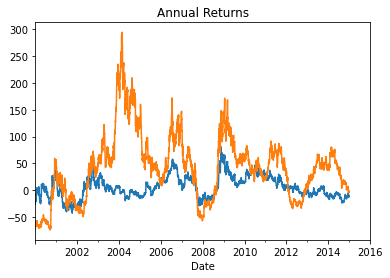

In [13]:
ann_return.IBM.plot()
ann_return.AAPL.plot()
plt.title('Annual Returns')

Text(0.5, 1.0, 'Cummulative Returns')

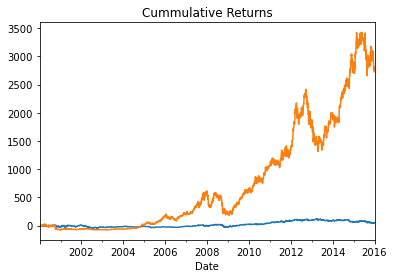

In [14]:
cum_return.IBM.plot()
cum_return.AAPL.plot()
plt.title('Cummulative Returns')

Text(0.5, 1.0, 'Median Annual Returns')

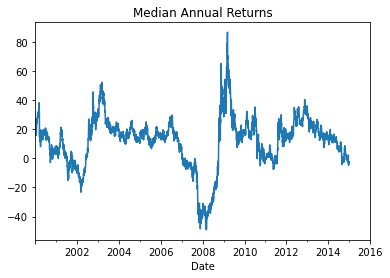

In [15]:
#e
ann_return.median(axis=1).plot()
plt.title('Median Annual Returns')

In [16]:
#f
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
df = pd.read_html(url,header=0)[0]
df.head(3)

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)


In [17]:
df['Date first added'] = pd.to_datetime(df['Date first added'],errors='coerce')
df['GICS Sector'] = df['GICS Sector'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Symbol                 505 non-null    object        
 1   Security               505 non-null    object        
 2   SEC filings            505 non-null    object        
 3   GICS Sector            505 non-null    category      
 4   GICS Sub-Industry      505 non-null    object        
 5   Headquarters Location  505 non-null    object        
 6   Date first added       449 non-null    datetime64[ns]
 7   CIK                    505 non-null    int64         
 8   Founded                505 non-null    object        
dtypes: category(1), datetime64[ns](1), int64(1), object(6)
memory usage: 32.6+ KB


DTE Energy Co. is the oldest company listed.

In [18]:
df.sort_values(by='Date first added', ascending=True).head(1)
#df.sort_values(df.columns[6], ascending=True).head(1)

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
154,DTE,DTE Energy Co.,reports,Utilities,Multi-Utilities,"Detroit, Michigan",1957-03-04,936340,1995


companies have headquarters in Indiana

In [19]:
indi=df['Headquarters Location'].str.contains('Indiana')
df[indi]

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
41,ANTM,Anthem,reports,Health Care,Managed Health Care,"Indianapolis, Indiana",2002-07-25,1156039,2014 (1946)
131,CMI,Cummins Inc.,reports,Industrials,Industrial Machinery,"Columbus, Indiana",1965-03-31,26172,1919
156,DRE,Duke Realty Corp,reports,Real Estate,Industrial REITs,"Indianapolis, Indiana",2017-07-26,783280,1972
287,LLY,Lilly (Eli) & Co.,reports,Health Care,Pharmaceuticals,"Indianapolis, Indiana",1970-12-31,59478,1876
338,NI,NiSource Inc.,reports,Utilities,Multi-Utilities,"Merrillville, Indiana",NaT,1111711,1912
413,SPG,Simon Property Group Inc,reports,Real Estate,Retail REITs,"Indianapolis, Indiana",2002-06-26,1063761,2003
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [20]:
#g

m = ann_return.median().reset_index(name='median annual return')
df3 = pd.merge(m,df,left_on=m.columns[0],right_on=df.columns[0])
df3 = df3[['ticker', 'Security', 'GICS Sector', 'median annual return']].round(2)
df3.head(3)

,ticker,Security,GICS Sector,median annual return
0,A,Agilent Technologies Inc,Health Care,3.04
1,AAPL,Apple Inc.,Information Technology,42.75
2,ABC,AmerisourceBergen Corp,Health Care,20.46


Text(0.5, 1.0, 'Median Annual Returns')

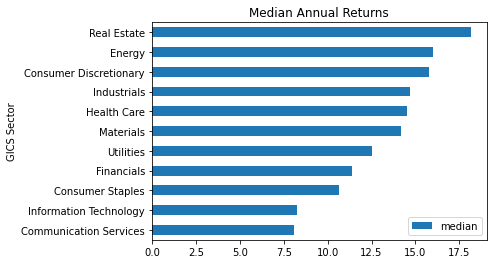

In [21]:
#h
df4 = df3.groupby(['GICS Sector'])['median annual return'].median().reset_index(name='median')
df4 = df4.sort_values(by='median', ascending=True)
df4.plot.barh(x='GICS Sector', y='median')
plt.title('Median Annual Returns')

Real Estate would have been good ones to invest in for one year